# Module 3 Final Project Submission
* Student name: **Chelsea Power**
* Student pace: **part time**
* Scheduled project review date/time: **July 11, 2019 at 2:30 pm ET**
* Instructor name: **Joe San Pietro**
* Blog post URL: **TBD**

## Purpose

For this project, I will be using music streaming session data from Spotify to with 27 features to determine if a track will be played or skipped using the predictor variable **not_skipped**. https://developer.spotify.com/documentation/web-api/reference/object-model/


## Data Dictionary

* **duration**: Length of track in seconds
* **release_year**: Estimate of year the track was released
* **us_popularity_estimate**: Estimate of the US popularity percentile of the track as of October 12, 2018
* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* **flatness**: See accousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* **mechanism**: See accousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **mode**: (Will be split into two columns) Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* **acoustic_vector_0**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_1**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_2**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_3**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_4**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_5**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_6**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_7**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* <span style="color:green">**not_skipped**: Target variable. Boolean indicating that the track was played
in its entirety</span>
* **hist_user_behavior_n_seekfwd**: Number of times the user did a seek forward within track
* **hist_user_behavior_n_seekback**: Number of times the user did a seek back within track
* **hour_of_day**: {0-23} - The hour of day
* **premium**: Boolean indicating if the user was on premium or not. This has potential implications for skipping behavior.

## Understand and Loading the Datasets

In [70]:
# Import required libraries
import pandas as pd
import numpy as np

df_log = pd.read_csv('log_mini.csv')

#Look at size of the dataset
df_log.shape

(167880, 21)

In [71]:
#Look at the columns and first 10 rows of the dataset
df_log.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [72]:
#Rename column track_id_clean to track_id
df_log.rename(columns = {'track_id_clean':'track_id'}, inplace = True)

#Reorder colums in dataframe
df_log = df_log.reindex_axis(['track_id','session_id','session_position','session_length','skip_1',
                              'skip_2','skip_3','not_skipped','context_switch','no_pause_before_play',
                              'short_pause_before_play','long_pause_before_play',
                              'hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback',
                              'hist_user_behavior_is_shuffle','hour_of_day','date','premium','context_type',
                              'hist_user_behavior_reason_start','hist_user_behavior_reason_end'], axis=1)

#Confirm changes
df_log.head()

,track_id,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [73]:
#Open second csv file
df_music = pd.read_csv('tf_mini.csv')

#Look at size of the dataset
df_music.shape

(50704, 30)

In [74]:
#Look at the columns and first 10 rows of the dataset
df_music.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [75]:
#Merge CSV files into a single file based on track_id
df_music_log = pd.merge(df_music, df_log, on="track_id", how='inner')
df_music_log.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,0,0,0,True,10,2018-07-15,True,user_collection,trackdone,trackdone
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,0,0,0,False,23,2018-07-14,True,radio,trackdone,trackdone
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,0,0,0,False,23,2018-07-14,True,radio,backbtn,fwdbtn
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,1,0,0,False,22,2018-07-14,True,user_collection,trackdone,trackdone
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,1,0,0,False,20,2018-07-14,True,catalog,trackdone,endplay


## Data Preparation: Scrub the data

* Data type conversions (e.g. numeric data mistakenly encoded as objects)
* Detect and deal with missing values
* Remove unnecessary columns

In [76]:
# Look at new dataframe column types
df_music_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 50 columns):
track_id                           167880 non-null object
duration                           167880 non-null float64
release_year                       167880 non-null int64
us_popularity_estimate             167880 non-null float64
acousticness                       167880 non-null float64
beat_strength                      167880 non-null float64
bounciness                         167880 non-null float64
danceability                       167880 non-null float64
dyn_range_mean                     167880 non-null float64
energy                             167880 non-null float64
flatness                           167880 non-null float64
instrumentalness                   167880 non-null float64
key                                167880 non-null int64
liveness                           167880 non-null float64
loudness                           167880 non-null float64
mechanism

The following 16 **object** and **boolean** columns are unecessary and will be removed from the data set:

* **track_id**: numerical ordering with no valuable information
* **session_id**: numerical ordering with no valuable information
* **session_position**: numerical position of row within session
* **session_length**: numerical of rows within session
* **skip_1**: categorical with no valuable information
* **skip_2**: categorical with no valuable information
* **skip_3**: categorical with no valuable information
* **context_switch**: categorical indicating if the user changed context between the previous row and the current row
* **no_pause_before_play**: categorical indicating if there was no pause between playback of the previous track and this track
* **short_pause_before_play**: categorical indicating if there was a short pause between playback of the previous track and this track
* **long_pause_before_play**: categorical indicating if there was a long pause between playback of the previous track and this track
* **hist_user_behavior_is_shuffle**: categorical indicating if the user encountered this track while shuffle mode was activated
* **context_type**: object value on what type of context the playback occurred within
* **date**: numerical with no valuable information
* **hist_user_behavior_reason_start**: object value for the user action which led to the current track being played
* **hist_user_behavior_reason_end**: object value for the user action which led to the current track playback ending

In [77]:
df_music_log = df_music_log.drop(['track_id', 'session_id', 'session_position', 'session_length',
                                  'skip_1','skip_2','skip_3','context_switch','no_pause_before_play',
                                  'short_pause_before_play','long_pause_before_play',
                                  'hist_user_behavior_is_shuffle','context_type','date',
                                  'hist_user_behavior_reason_start','hist_user_behavior_reason_end'], axis=1)

In [78]:
# Check if there are any null/missing values
# Run an apply method utilizing a lambda expression that checks to see if there was any missing values through each column. 
# Printing the column name and total missing values for that column, iteratively.
df_music_log.apply(lambda x: x.isnull().sum())

duration                         0
release_year                     0
us_popularity_estimate           0
acousticness                     0
beat_strength                    0
bounciness                       0
danceability                     0
dyn_range_mean                   0
energy                           0
flatness                         0
instrumentalness                 0
key                              0
liveness                         0
loudness                         0
mechanism                        0
mode                             0
organism                         0
speechiness                      0
tempo                            0
time_signature                   0
valence                          0
acoustic_vector_0                0
acoustic_vector_1                0
acoustic_vector_2                0
acoustic_vector_3                0
acoustic_vector_4                0
acoustic_vector_5                0
acoustic_vector_6                0
acoustic_vector_7   

In [79]:
#Look at value counts of the predictor variable not_skipped
df_music_log.not_skipped.value_counts()

False    111996
True      55884
Name: not_skipped, dtype: int64

**Warning**: Data is unbalanced.

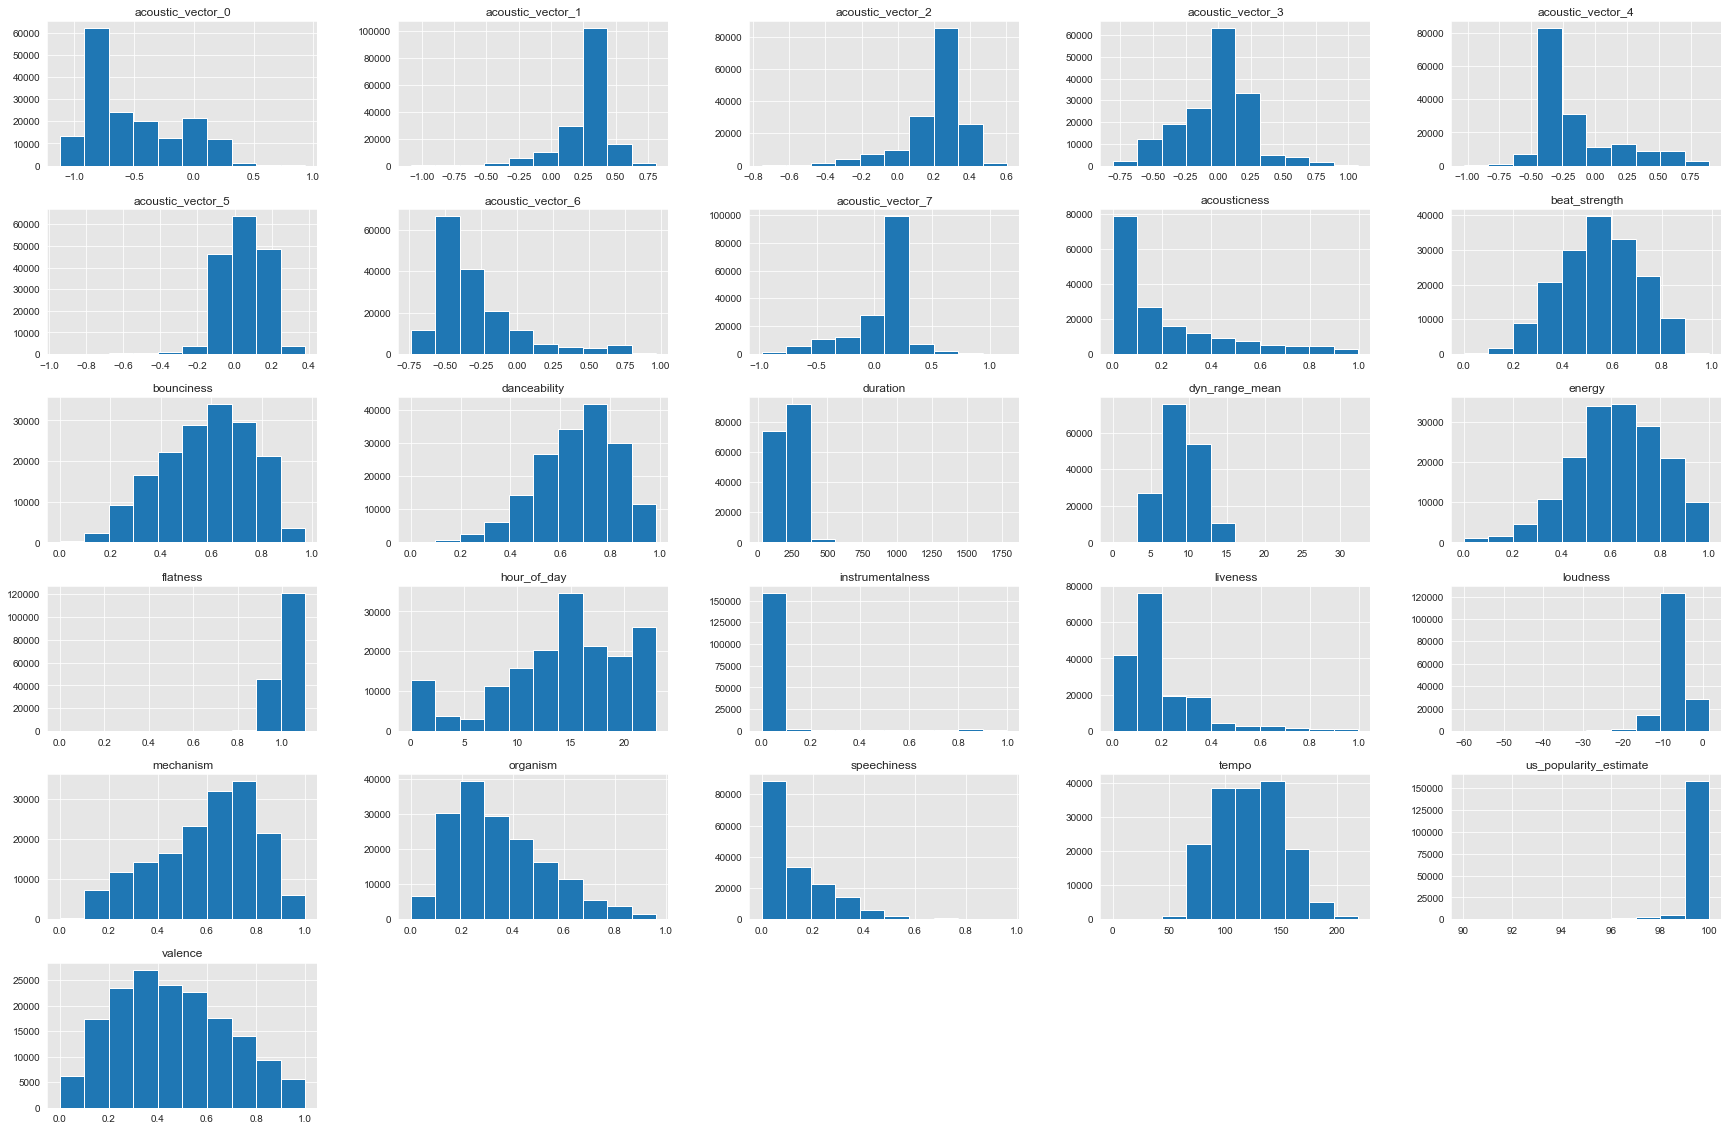

In [80]:
# Create continuous dataset and look at distributions for data
df_music_lin = df_music_log.drop(['release_year','mode','not_skipped','premium','key','time_signature',
                                  'hist_user_behavior_n_seekback','hist_user_behavior_n_seekfwd'], axis=1)
df_music_lin.hist(figsize = [30, 20]);

**Summary**: Only a few of the variables appear to have normal distributions.

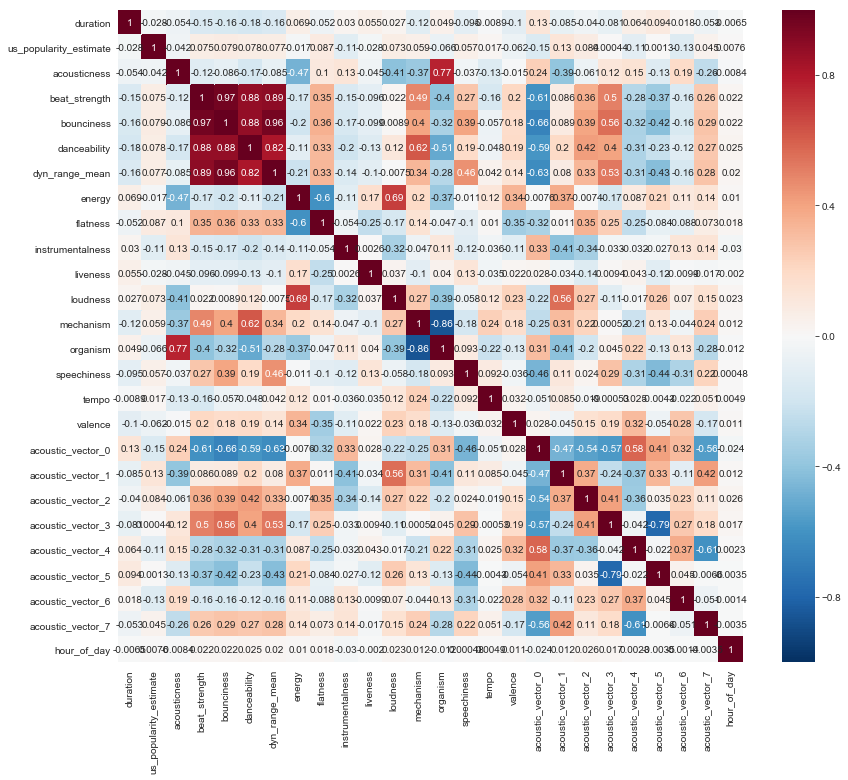

In [81]:
#Create coorelation heatmap - check for multicolinarity
from matplotlib import pyplot as plt
import seaborn as sns

correlation = df_music_lin.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

**Summary**: `beat_strength`, `bounciness`, `danceability` and `dyn_range_mean` seem to be highly correlated.
Secondarily, `acousticness` and `organism` also appear to be highly correlated. These columns are will be removed from the test/train dataset.

## Logistic Regression - Define X and Y

In [82]:
y = df_music_log['not_skipped']
X = df_music_log.drop('not_skipped', axis = 1)

## Normalize the Data
Normalize the data prior to fitting the model

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
# Removed beat_strength, bounciness, danceability, dyn_range_mean, acousticness, organism

x_feats = ['duration','release_year','us_popularity_estimate','energy','flatness','instrumentalness',
           'key','liveness','loudness','mechanism','mode','speechiness','tempo','time_signature',
           'valence','acoustic_vector_0','acoustic_vector_1','acoustic_vector_2','acoustic_vector_3',
           'acoustic_vector_4','acoustic_vector_5','acoustic_vector_6','acoustic_vector_7',
           'hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback','hour_of_day','premium']
X = pd.get_dummies(df_music_log[x_feats], drop_first=False)
y = df_music_log.not_skipped
X.head()

,duration,release_year,us_popularity_estimate,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,...,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day,premium,mode_major,mode_minor
0,109.706673,1950,99.975414,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,...,0.832467,-0.213871,-0.299464,-0.675907,0,0,10,True,1,0
1,187.693329,1950,99.969430,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,...,0.371803,-0.420558,-0.213120,-0.525795,0,0,23,True,1,0
2,187.693329,1950,99.969430,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,...,0.371803,-0.420558,-0.213120,-0.525795,0,0,23,True,1,0
3,160.839996,1951,99.602549,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,...,0.411094,-0.187749,-0.387599,-0.433496,0,0,22,True,0,1
4,175.399994,1951,99.665018,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,...,0.614825,-0.111419,-0.265953,-0.542753,0,0,20,True,1,0


## Train-Test Split

Split the data into train and test sets.

In [85]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets (automatically uses stratified sampling by labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [86]:
# concatenate our training data back together
training_data = pd.concat([X_train, y_train], axis=1)

In [87]:
# separate minority and majority classes
not_safe = training_data[training_data.not_skipped==0]
safe = training_data[training_data.not_skipped==1]

In [88]:
from sklearn.utils import resample
# upsample minority
not_safe_upsampled = resample(not_safe, 
                              replace=True, # sample with replacement
                              n_samples=len(safe), # match number in majority class
                              random_state=42) # reproducible results

In [89]:
# combine majority and upsampled minority
upsampled = pd.concat([safe, not_safe_upsampled])

In [90]:
# check new class counts
print(upsampled.not_skipped.value_counts())

True     41968
False    41968
Name: not_skipped, dtype: int64


In [91]:
X_train = upsampled.drop('not_skipped', axis=1)
y_train = upsampled.not_skipped

In [92]:
# Scaling X using StandardScaler
# Only fit training data to avoid data leakage
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X.columns))
X_test = pd.DataFrame(scaler.transform(X_test), columns=list(X.columns))
X_train.head()

,duration,release_year,us_popularity_estimate,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,...,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day,premium,mode_major,mode_minor
0,0.223932,0.262050,0.258610,-0.937114,0.626567,0.259708,0.490605,-0.164850,-0.763453,1.054037,...,-0.748129,0.870412,0.282372,0.275119,-0.081668,-0.068909,-0.027825,0.480234,0.787646,-0.787646
1,-0.024862,-0.990430,-0.893654,1.829955,-2.274088,5.077162,1.575044,-0.722332,0.266545,-1.158701,...,1.531195,0.427794,-0.207899,2.576975,-0.081668,-0.068909,-1.195934,0.480234,0.787646,-0.787646
2,0.381454,0.366423,0.268771,0.261379,-0.693398,-0.224747,1.575044,0.763020,0.037899,1.008007,...,-0.595642,1.153395,0.919818,0.368701,-0.081668,-0.068909,-0.194698,0.480234,-1.269606,1.269606
3,0.005927,0.366423,0.279554,0.647918,0.285378,-0.225109,0.219495,-0.646930,0.340583,0.200802,...,-0.140573,0.854092,1.644313,0.605504,-0.081668,-0.068909,-0.027825,0.480234,0.787646,-0.787646
4,0.059188,-1.094804,-1.227606,-1.371521,0.871068,-0.225109,-0.864944,-0.733941,-1.032541,-0.736941,...,0.286997,0.569433,1.496378,-2.570012,-0.081668,-0.068909,-0.361571,0.480234,0.787646,-0.787646


## Fit the model

In [93]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = True, C=1e12)
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [94]:
print(y_train.value_counts())
print(y_test.value_counts())

True     41968
False    41968
Name: not_skipped, dtype: int64
False    28054
True     13916
Name: not_skipped, dtype: int64


### Predict

In [95]:
#Predict against test set using Sigmoid function
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [96]:
y_hat_test = logreg.predict_proba(X_test)
y_hat_test[0]

array([0.46108828, 0.53891172])

In [97]:
logreg.predict_proba(X_train)

array([[0.4675078 , 0.5324922 ],
       [0.48361542, 0.51638458],
       [0.48179227, 0.51820773],
       ...,
       [0.4793447 , 0.5206553 ],
       [0.50727409, 0.49272591],
       [0.48965125, 0.51034875]])

46.7% chance 0 (False - not skipped) and 53.2% chance of 1 (True - not skipped)

### Initial evaluation 
How may times was the classifier correct for the training set?

In [98]:
logreg.score(X_train, y_train)

0.545224933282501

54% accuracy with the train set

### How may times was the classifier correct for the test set?

In [99]:
logreg.score(X_test, y_test)

0.5339051703597808

53% accuracy with the test set

In [100]:
logreg.coef_[0]

array([-1.43259704e-01,  7.50172769e-02,  3.17058703e-02, -2.12702243e-02,
       -3.43913519e-02,  1.09038107e-03, -1.86694418e-03, -1.43623383e-02,
       -2.04902461e-03,  1.59896705e-02, -4.27226441e-03, -1.25236490e-02,
       -1.58435676e-02, -8.04697721e-03, -6.40704690e-02, -9.49931985e-02,
        7.32516996e-03, -1.38731316e-01,  5.76084886e-02, -6.85040425e-03,
        9.34530142e-02, -8.01535155e-03, -4.06064638e-01,  2.81674509e-01,
       -3.51368789e-02,  2.61559890e-04,  1.67352230e-03, -1.67352230e-03])

In [101]:
for feature, weight in zip(X.columns, logreg.coef_[0]):
    print("{} has a weight of : {}".format(feature, weight))

duration has a weight of : -0.1432597041255111
release_year has a weight of : 0.07501727689742949
us_popularity_estimate has a weight of : 0.03170587034155032
energy has a weight of : -0.02127022426673708
flatness has a weight of : -0.034391351878001075
instrumentalness has a weight of : 0.0010903810684584538
key has a weight of : -0.0018669441796082722
liveness has a weight of : -0.014362338320665372
loudness has a weight of : -0.0020490246059417048
mechanism has a weight of : 0.01598967050388103
speechiness has a weight of : -0.004272264413857087
tempo has a weight of : -0.01252364897722776
time_signature has a weight of : -0.015843567581906665
valence has a weight of : -0.008046977213324194
acoustic_vector_0 has a weight of : -0.06407046897501471
acoustic_vector_1 has a weight of : -0.09499319854515664
acoustic_vector_2 has a weight of : 0.00732516995925405
acoustic_vector_3 has a weight of : -0.13873131589394436
acoustic_vector_4 has a weight of : 0.05760848860508484
acoustic_vecto

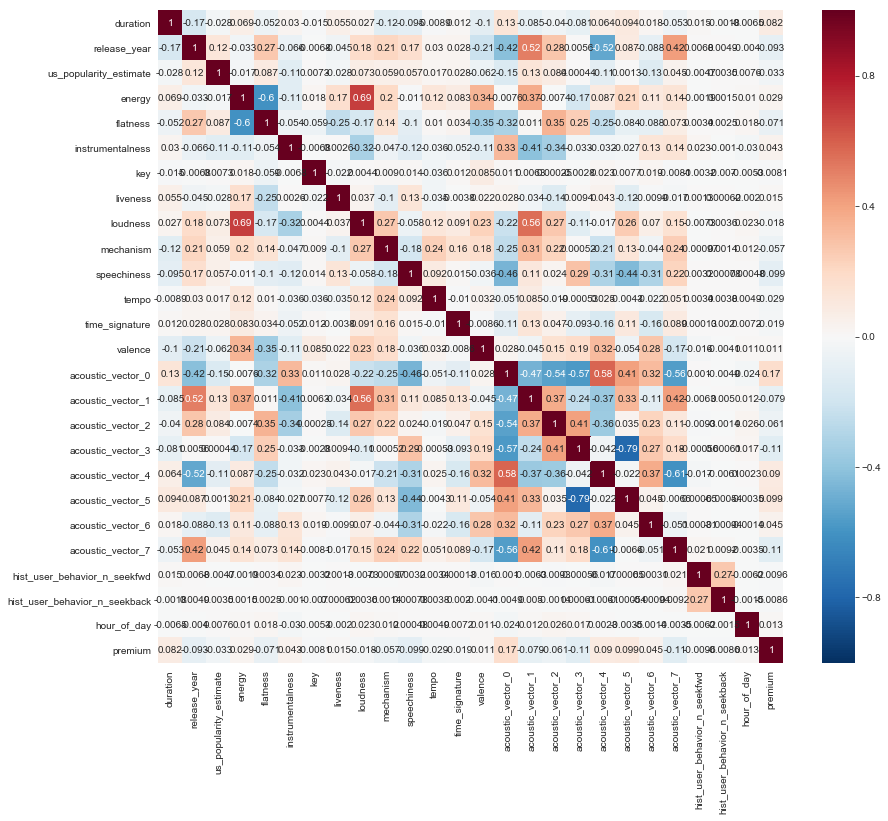

In [102]:
# Display correlation heatmap 
correlation = df_music_log[x_feats].corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

**Summary**: `energy` and `loudness` are candidates for removal.

## Confusion Matrix

In [103]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[21704 20264]
 [17908 24060]]


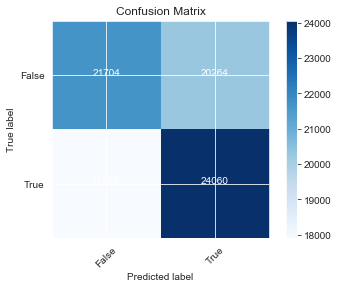

In [104]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

## ROC Metrics
Calculate the false positive rate and true positive rate (you can use the built in metrics from SciKit-Learn) of your classifier.

In [105]:
from sklearn.metrics import roc_curve, auc

#First calculate the probability scores of each of the datapoints:
y_score = model_log.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = model_log.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

## ROC Graph
Plot the Receiver Operating Characteristic Curve for both the train and test sets using the false positive rate and true positive rate.

AUC: 0.565446776586763


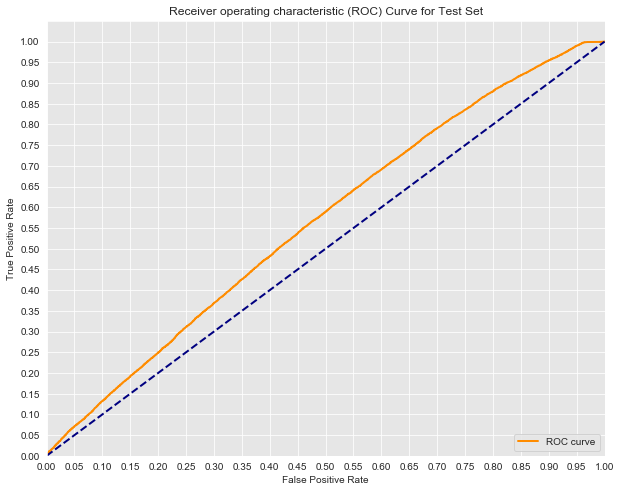

In [106]:
#Seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

#Test Set
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

AUC: 0.5681489260366702


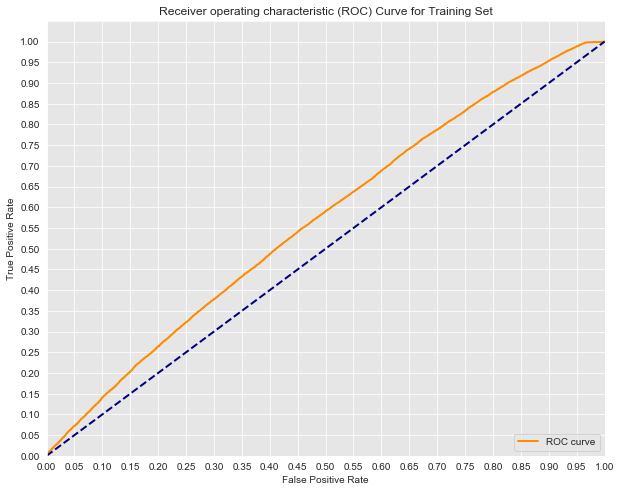

In [107]:
#Seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

#Training Set
plt.figure(figsize=(10,8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

## Random Forest
Create a Decision Tree Classifier.

In [108]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
np.random.seed(0)

tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Feature Importance
Check the feature_importances_ attribute of our trained model to see what it displays.

In [109]:
tree_clf.feature_importances_

array([1.93479294e-01, 0.00000000e+00, 5.71913219e-02, 2.36538998e-03,
       0.00000000e+00, 4.21033343e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.38723837e-04, 1.41643471e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.56962978e-02, 0.00000000e+00,
       2.69376537e-02, 1.34898544e-03, 0.00000000e+00, 3.09267900e-02,
       1.71792453e-02, 0.00000000e+00, 4.03104327e-01, 2.06005203e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

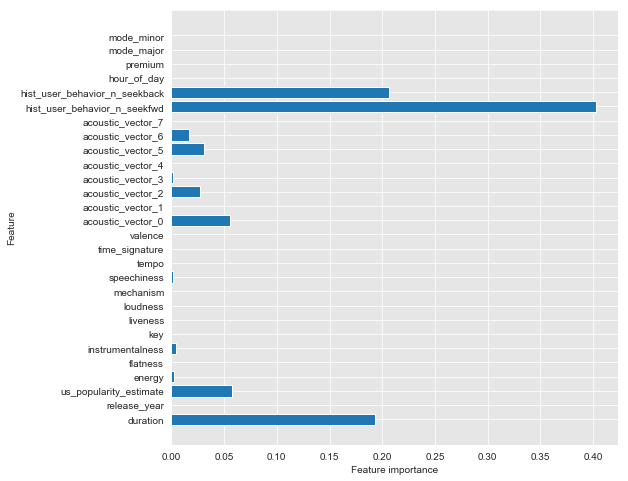

In [110]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

**Top five features**: `hist_user_behavior_n_seekfwd`, `hist_user_behavior_n_seekback`, `duration`, `us_popularity_estimate` and `acoustic_vector_0`.

## Model performance

In [111]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[15091 12963]
 [ 6183  7733]]
              precision    recall  f1-score   support

       False       0.71      0.54      0.61     28054
        True       0.37      0.56      0.45     13916

   micro avg       0.54      0.54      0.54     41970
   macro avg       0.54      0.55      0.53     41970
weighted avg       0.60      0.54      0.56     41970



In [112]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 54.38%


## Create a RandomForestClassifier

In [113]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
# Check the training accuracy of the model using the .score() method
forest.score(X_train, y_train)

0.5616302897445673

In [115]:
# Check the testing accuracy of the model using the .score() method 
forest.score(X_test, y_test)

0.5367167024064808

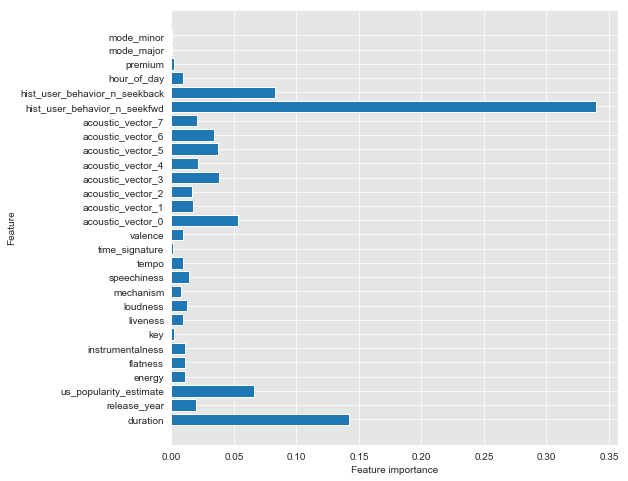

In [116]:
# Plot the feature importance
plot_feature_importances(forest)

**Top five features**: `hist_user_behavior_n_seekfwd`, `duration`, `hist_user_behavior_n_seekback`, `us_popularity_estimate` and `acoustic_vector_0`. These are slightly different in order from the previous model.

In [117]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
rf_tree_1 = forest_2.estimators_[0]

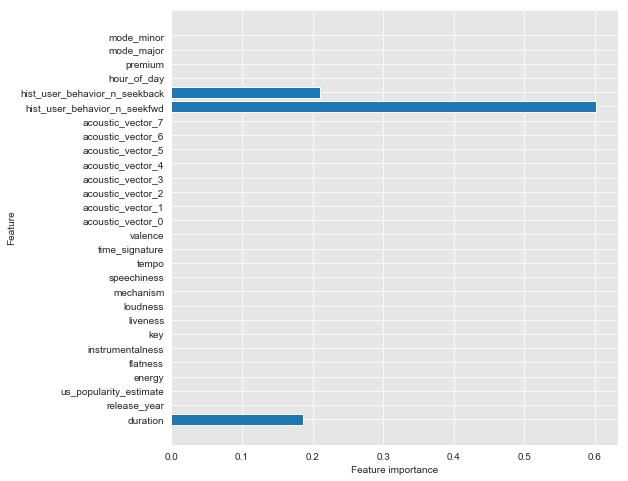

In [119]:
plot_feature_importances(rf_tree_1)

**Top three features**: `hist_user_behavior_n_seekfwd`, `hist_user_behavior_n_seekback`, and `duration`.

## XG Boost
Build a model that can accurately classify if a track will be skipped based on the features in the dataset.

In [120]:
import xgboost as xgb
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [121]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [122]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 57.11%
Validation accuracy: 53.94%


## Grid Search

In [123]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [126]:
dt_grid_search = GridSearchCV(tree_clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 3, 4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

### Examine the Best Parameters

In [127]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X, y)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 69.3%
Mean Testing Score: 66.87%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

**Results**: The parameter tuning using GridSearchCV improved our model's performance from **57% to 69%**. The model also shows no signs of overfitting, as evidenced by the close training and testing scores.

### Next Steps

* The model still has potential to be further improved by running Principal Component Analysis (PCA).
* Another consideration would be to re-run this project using a different predictor variable to see if the accuracy can be increased further.